In [121]:
from datasets import load_from_disk
from transformers import AutoConfig, AutoModelForQuestionAnswering, AutoTokenizer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [122]:
import os
os.listdir('../data')

['tfidv.bin',
 'train_dataset',
 'sparse_embedding.bin',
 'test_dataset',
 'wikipedia_documents.json']

# 데이터 불러오기

In [123]:
# load dataset
datasets = load_from_disk("../data/train_dataset")

trainset = pd.DataFrame(datasets['train'])
validset = pd.DataFrame(datasets['validation'])

with open('../data/wikipedia_documents.json',"r") as p:
    corpus = json.load(p)
    corpus = pd.DataFrame(corpus).T

# 중복 데이터 개수 확인

In [124]:
#train set
print(len(trainset))
trainset.describe(include="all")

3952


title                                            context  \
count   3952                                               3952   
unique  2716                                               3340   
top      윤치호  그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...   
freq      43                                                  4   
mean     NaN                                                NaN   
std      NaN                                                NaN   
min      NaN                                                NaN   
25%      NaN                                                NaN   
50%      NaN                                                NaN   
75%      NaN                                                NaN   
max      NaN                                                NaN   

                     question            id  \
count                    3952          3952   
unique                   3952          3952   
top     김 루치아의 재판 결과 내려진 선고는?  mrc-1-000125   
freq                        1             1   
mean                      NaN           NaN   
std                       NaN           NaN   
min                       NaN           NaN   
25%                       NaN           NaN   
50%                       NaN           NaN   
75%                       NaN           NaN   
max                       NaN           NaN   

                                              answers   document_id  \
count                                            3952   3952.000000   
unique                                           3926           NaN   
top     {'answer_start': [328], 'text': ['명령형 프로그램']}           NaN   
freq                                                2           NaN   
mean                                              NaN  28399.783401   
std                                               NaN  17475.051830   
min                                               NaN   4572.000000   
25%                                               NaN  11615.750000   
50%                                               NaN  26295.000000   
75%                                               NaN  44240.250000   
max                                               NaN  60603.000000   

        __index_level_0__  
count         3952.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean          1496.027328  
std           1060.480948  
min              0.000000  
25%            587.000000  
50%           1189.500000  
75%           2416.250000  
max           3593.000000

전체 3952개 데이터 중 일부 중복 데이터가 존재함을 확인

In [125]:
trainset.context.value_counts().value_counts()
#중복으로 사용된 context는 총 579개이며
# 그 중 4번 중복은 1개, 3번 중복은 31개, 2번 중복은 547개가 있음

# trainset에서 중복인 context
# trainset.context.value_counts()[trainset.context.value_counts().values>1].to_frame()

1    2761
2     547
3      31
4       1
Name: context, dtype: int64

In [126]:
trainset[trainset.context.str.startswith("그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한")]

title                                            context  \
201    윤치호  그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...   
1426   윤치호  그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...   
1622   윤치호  그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...   
2199   윤치호  그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...   

                                             question            id  \
201   평상시 기독교선교사들로부터 차별적 대우를 받은 윤치호가 생각한 미국의 중대한 속성은?  mrc-0-001069   
1426                 윤치호가 미국의 특징이 인종주의라고 생각하게 만든 인물은?  mrc-1-000949   
1622                 조선에서도 윤치호를 유색 인종이라는 이유로 차별한 사람은?  mrc-0-000476   
2199                         윤치호는 누구의 설교를 듣고 충격을 받았나?  mrc-0-002440   

                                                answers  document_id  \
201           {'answer_start': [645], 'text': ['인종주의']}         5284   
1426       {'answer_start': [570], 'text': ['기독교선교사들']}         5284   
1622       {'answer_start': [254], 'text': ['미국인 선교사']}         5284   
2199  {'answer_start': [824], 'text': ['남부 출신 남감리교회 ...         5284   

      __index_level_0__  
201                 705  
1426                615  
1622                323  
2199               1598

In [127]:
trainset['answers']=trainset.answers.map(str)
print("중복 제거 전 개수: ", len(trainset))
print("중복 제거 후 개수: ",len(trainset.drop(["__index_level_0__","document_id","id","title"],axis=1).drop_duplicates()))
trainset['answers']=trainset.answers.map(eval)

중복 제거 전 개수:  3952
중복 제거 후 개수:  3952


동일한 context는 있지만, 질문과 답변이 다르므로 중복이 아님을 확인

In [128]:
# validset도 중복 확인
validset.describe(include="all")


title                                            context  \
count     240                                                240   
unique    228                                                235   
top     태양권계면  태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...   
freq        2                                                  2   
mean      NaN                                                NaN   
std       NaN                                                NaN   
min       NaN                                                NaN   
25%       NaN                                                NaN   
50%       NaN                                                NaN   
75%       NaN                                                NaN   
max       NaN                                                NaN   

                                          question            id  \
count                                          240           240   
unique                                         240           240   
top     네거티브 광고를 할 때 기업은 법적인 문제 외에 또 무엇을 생각해야 하는가?  mrc-0-004725   
freq                                             1             1   
mean                                           NaN           NaN   
std                                            NaN           NaN   
min                                            NaN           NaN   
25%                                            NaN           NaN   
50%                                            NaN           NaN   
75%                                            NaN           NaN   
max                                            NaN           NaN   

                                            answers   document_id  \
count                                           240    240.000000   
unique                                          240           NaN   
top     {'answer_start': [1018], 'text': ['1895년']}           NaN   
freq                                              1           NaN   
mean                                            NaN  29027.704167   
std                                             NaN  17915.733034   
min                                             NaN   4866.000000   
25%                                             NaN  11726.250000   
50%                                             NaN  27485.000000   
75%                                             NaN  44860.250000   
max                                             NaN  60305.000000   

        __index_level_0__  
count          240.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean          1572.008333  
std           1049.535956  
min             16.000000  
25%            671.250000  
50%           1372.000000  
75%           2470.250000  
max           3575.000000

240 개 중 중복이 존재함   
trainset과 동일한 방식으로 중복 데이터 확인 진행

In [129]:
validset.context.value_counts().value_counts()

1    230
2      5
Name: context, dtype: int64

5개의 데이터가 중복됨을 확인

In [130]:
validset['answers']=validset.answers.map(str)
print("중복 제거 전 개수: ", len(validset))
print("중복 제거 후 개수: ",len(validset.drop(["__index_level_0__","document_id","id","title"],axis=1).drop_duplicates()))
validset['answers']=validset.answers.map(eval)

중복 제거 전 개수:  240
중복 제거 후 개수:  240


validset 역시 context가 중복으로 사용되지만, 질문이 다르므로 이상없음을 확인

In [131]:
corpus.describe(include="all")

text corpus_source   url  \
count                                               60613         60613  4554   
unique                                              56737             1     1   
top     세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  TODO   
freq                                                   40         60613  4554   

       domain  title author html  document_id  
count       0  60613      0    0        60613  
unique      0  31755      0    0        60613  
top       NaN     장면    NaN  NaN        60612  
freq      NaN    146    NaN  NaN            1

3876개의 context가 중복으로 사용되었습니다.

In [132]:
corpus[corpus.text==corpus.text.value_counts().index[0]]

text corpus_source   url  \
57264  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57541  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57543  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57546  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57549  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57552  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57556  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57569  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57582  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57591  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57671  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57674  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57685  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57691  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57715  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57716  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57731  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57778  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57842  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57845  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57920  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57924  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57956  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57983  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
57997  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58006  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58036  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58059  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58090  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58106  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58123  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58130  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58140  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58192  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58205  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58207  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58214  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58303  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
58342  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   
59091  세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  None   

      domain                   title author  html document_id  
57264   None           인도의 코로나19 범유행   None  None       57264  
57541   None           케냐의 코로나19 범유행   None  None       57541  
57543   None          카메룬의 코로나19 범유행   None  None       57543  
57546   None          멕시코의 코로나19 범유행   None  None       57546  
57549   None    콩고 민주 공화국의 코로나19 범유행   None  None       57549  
57552   None      사우디아라비아의 코로나19 범유행   None  None       57552  
57556   None           토고의 코로나19 범유행   None  None       57556  
57569   None        아르헨티나의 코로나19 범유행   None  None       57569  
57582   None          잠비아의 코로나19 범유행   None  None       57582  
57591   None   중앙아프리카 공화국의 코로나19 범유행   None  None       57591  
57671   None          우간다의 코로나19 범유행   None  None       57671  
576

In [133]:
corpus[corpus.text==corpus.text.value_counts().index[0]].describe(include="all")

text corpus_source  url  \
count                                                  40            40    0   
unique                                                  1             1    0   
top     세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...         위키피디아  NaN   
freq                                                   40            40  NaN   

       domain             title author html  document_id  
count       0                40      0    0           40  
unique      0                40      0    0           40  
top       NaN  에리트레아의 코로나19 범유행    NaN  NaN        57983  
freq      NaN                 1    NaN  NaN            1

- corpus에서 가장 많이 중복으로 사용된 context는 다음과 같다   
- 결과를 보면, context는 중복이지만 title이 모두 다른 것으로 확인된다.
- 실제로, retreival.py의 64번째 줄을 보면 중복을 제거함을 알 수 있다.
  - dict.fromkeys([v["text"] for v in wiki.values()])
- 따라서 중복을 제거한 상태로 분석을 진행하자

In [134]:
ori_len = len(corpus)
corpus = corpus.drop_duplicates(['text'])
print("중복 제거 전: ", ori_len)
print("중복 제거 후: ", len(corpus))
print("중복 개수 : ", ori_len - len(corpus))



중복 제거 전:  60613
중복 제거 후:  56737
중복 개수 :  3876


# 답변 위치와 실제 답변

In [135]:
# answer의 답변 위치와, 실제 답변의 위치가 일치하는지를 확인 
print(f"trainset 전체 데이터 개수 : {len(trainset)}")
print("answer의 답변 위치와 실제 답변 위치가 일치하는 데이터 개수 :",trainset.apply(lambda x : (x.answers["text"][0]==x.context[x.answers['answer_start'][0] : x.answers['answer_start'][0]+len(x.answers['text'][0])]),axis=1).sum())
print("*"*100)
print(f"validset 전체 데이터 개수 : {len(validset)}")
print("answer의 답변 위치와 실제 답변 위치가 일치하는 데이터 개수 :",validset.apply(lambda x : (x.answers["text"][0]==x.context[x.answers['answer_start'][0] : x.answers['answer_start'][0]+len(x.answers['text'][0])]),axis=1).sum())
print("*"*100)
print("trainset & validset 모두 일치")

trainset 전체 데이터 개수 : 3952
answer의 답변 위치와 실제 답변 위치가 일치하는 데이터 개수 : 3952
****************************************************************************************************
validset 전체 데이터 개수 : 240
answer의 답변 위치와 실제 답변 위치가 일치하는 데이터 개수 : 240
****************************************************************************************************
trainset & validset 모두 일치


모든 답변이 일치함

# context 길이

[trainset] min context 길이: 512
[trainset] max context 길이: 2059
[trainset] mean context 길이:  920.2206477732793
[trainset] median context 길이:  819.0


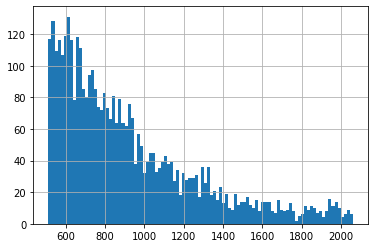

In [136]:
print("[trainset] min context 길이:", trainset.context.map(len).min())
print("[trainset] max context 길이:", trainset.context.map(len).max())
print("[trainset] mean context 길이: ", trainset.context.map(len).mean())
print("[trainset] median context 길이: ", trainset.context.map(len).median())

trainset.context.map(len).hist(bins=100)
plt.show()

[validset] min context 길이: 517
[validset] max context 길이: 2064
[validset] mean context 길이:  916.725
[validset] median context 길이:  820.5


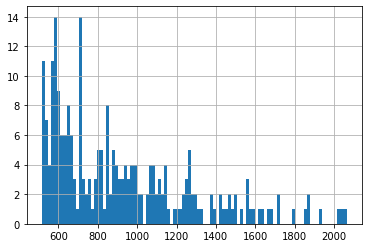

In [137]:
print("[validset] min context 길이:", validset.context.map(len).min())
print("[validset] max context 길이:", validset.context.map(len).max())
print("[validset] mean context 길이: ", validset.context.map(len).mean())
print("[validset] median context 길이: ", validset.context.map(len).median())

validset.context.map(len).hist(bins=100)
plt.show()

In [138]:
#corpus의 column 중 text를 context로 변환
corpus.columns = ['context', 'corpus_source', 'url', 'domain', 'title', 'author', 'html','document_id']

[corpus] min context 길이: 184
[corpus] max context 길이: 46099
[corpus] mean context 길이:  750.8205932636552
[corpus] median context 길이:  578.0
전체 56737개 중 validset&trainset의 최대 길이 2064를 넘는 데이터 개수 및 비율: 1712(3.02%)


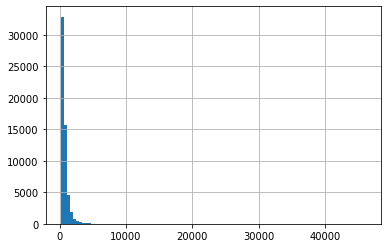

In [139]:
print("[corpus] min context 길이:", corpus.context.map(len).min())
print("[corpus] max context 길이:", corpus.context.map(len).max())
print("[corpus] mean context 길이: ", corpus.context.map(len).mean())
print("[corpus] median context 길이: ", corpus.context.map(len).median())
print(f"전체 {len(corpus)}개 중 validset&trainset의 최대 길이 2064를 넘는 데이터 개수 및 비율: {corpus.context.map(lambda x : len(x)>2064).sum()}({round(corpus.context.map(lambda x : len(x)>2064).sum()/len(corpus)*100,2)}%)")
corpus.context.map(len).hist(bins=100)
plt.show()

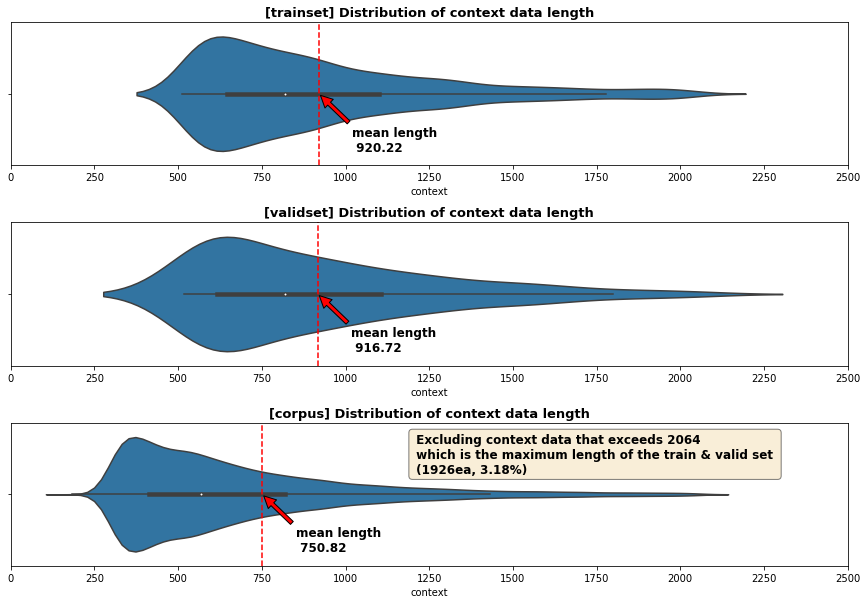

In [182]:
data_list = [trainset, validset, corpus]
data_list_name = ["trainset", "validset", "corpus"]
def get_graph(data_list, data_list_name):
    fig,ax = plt.subplots((len(data_list)),1,figsize=(15,10))
    for i, data in enumerate(data_list):
        if i==2:
            sns.violinplot(x=data[data.context.map(len)<=2064].context.map(len),ax=ax[i])
        else:
            sns.violinplot(x=data.context.map(len),ax=ax[i])
        ax[i].axvline(data.context.map(len).mean(), ls='--', color='red')
        ax[i].set_title(f"[{data_list_name[i]}] Distribution of context data length", fontsize = 13, fontweight='bold')
        ax[i].annotate(f'mean length \n {round(data.context.map(len).mean(),2)}', xy=(data.context.map(len).mean(), 0), xytext=(data.context.map(len).mean()+100, 0.4),fontsize=12,fontweight='semibold',
                    arrowprops=dict(facecolor='red', shrink=0.05))
        ax[i].set_xticks(range(0,2501,250))
        if data_list_name[i]=="corpus":
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax[i].text(s=" Excluding context data that exceeds 2064\n which is the maximum length of the train & valid set \n (1926ea, 3.18%)",
                    x=1200,y=-0.15, fontweight='semibold', fontsize=12, bbox=props)
    
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()
get_graph(data_list,data_list_name)


# answer 길이 

In [18]:
train_answer = trainset.answers.to_frame()
valid_answer = validset.answers.to_frame()

train_answer['len_answer'] = train_answer.answers.map(lambda x : len(x['text'][0]))
valid_answer['len_answer'] = valid_answer.answers.map(lambda x : len(x['text'][0]))
train_answer.head()


answers  len_answer
0        {'answer_start': [235], 'text': ['하원']}           2
1  {'answer_start': [212], 'text': ['《경영의 실제》']}           8
2        {'answer_start': [510], 'text': ['백성']}           2
3        {'answer_start': [625], 'text': ['중국']}           2
4         {'answer_start': [30], 'text': ['4개']}           2

In [19]:
def get_length(data, dataset_name):
    print(f"[{dataset_name}]")
    print(f"max length of answers : {data.len_answer.max()}")
    print(f"min length of answers : {data.len_answer.min()}")
    print(f"mean length of answers : {data.len_answer.mean().round(2)}")
    print(f"median length of answers : {data.len_answer.median().round(2)}")
    print(f"number of answers which exceed 30 : {sum(data.len_answer>30)}개(전체 : {len(data.len_answer)})")
    print(f"출력 가능한 답변의 길이를 지정해야 하는데, baseline에서는 default로 30이 지정되어 있음","\n")

get_length(train_answer,"trainset answers")
get_length(valid_answer,"validnset answers")

[trainset answers]
max length of answers : 83
min length of answers : 1
mean length of answers : 6.28
median length of answers : 5.0
number of answers which exceed 30 : 25개(전체 : 3952)
출력 가능한 답변의 길이를 지정해야 하는데, baseline에서는 default로 30이 지정되어 있음 

[validnset answers]
max length of answers : 64
min length of answers : 1
mean length of answers : 6.91
median length of answers : 5.0
number of answers which exceed 30 : 4개(전체 : 240)
출력 가능한 답변의 길이를 지정해야 하는데, baseline에서는 default로 30이 지정되어 있음 



In [20]:
#가장 긴 문장 및 가장 짧은 문장
def get_length(data, dataset_name):
    print(f"[{dataset_name}]")
    print(f"the longest answer : {data[data.len_answer == data.len_answer.max()].answers.values[0]['text'][0]}")
    print(f"the shortest answer : {data[data.len_answer == data.len_answer.min()].answers.values[0]['text'][0]}","\n")

get_length(train_answer,"trainset answers")
get_length(valid_answer,"validnset answers")

[trainset answers]
the longest answer : “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”
the shortest answer : 덱 

[validnset answers]
the longest answer : 깃털 셔틀콕의 타구감을 선호하고, 또한 플라스틱보다 깃털 셔틀콕이 정교한 컨트롤을 하기에 보다 더 적합하기 때문이다
the shortest answer : 욱 



In [21]:
# 가장 짧은 답변의 데이터 확인
def emphasize_answer(data, dataset_name,Max_len=True):
    print(f"[{dataset_name}]")
    if Max_len:
        text_len = data.answers.map(lambda x : len(x['text'][0])).max()
    else:
        text_len = data.answers.map(lambda x : len(x['text'][0])).min()
    idx = data[data.answers.map(lambda x : len(x['text'][0]))==text_len].index.values[0]

    print("index 번호: ",idx)
    print("질문: ", data.iloc[idx].question)
    print("답변: ", data.iloc[idx].answers)
    print("지문:\n",
          data.iloc[idx].context[:data.iloc[idx].answers['answer_start'][0]]+
          f"\033[31m\033[43m{data.iloc[idx].context[data.iloc[idx].answers['answer_start'][0]:data.iloc[idx].answers['answer_start'][0]+len(data.iloc[idx].answers['text'][0])]}\033[0m"+
          data.iloc[idx].context[data.iloc[idx].answers['answer_start'][0]+len(data.iloc[idx].answers['text'][0]):],
          "\n")

emphasize_answer(trainset, "trainset", Max_len=False)
emphasize_answer(validset, "validset", Max_len=False)

[trainset]
index 번호:  46
질문:  초고층 주거에서 차량과 사람의 활동 범위 중복을 최소화하는 장치는?
답변:  {'answer_start': [663], 'text': ['덱']}
지문:
 도곡 단지 전체에 4계절 녹음과 단풍이 풍성할 수 있는 계획을 하고 인도를 넓게 확장하여 보행자와 어린이에게 안전을 확보함과 동시에 휴게공간을 제공하는 것이 주요 의도이다. 타워팰리스 Ⅰ과 Ⅱ사이를 지 나는중앙로의 가로변에는 2열의 느티나무 가로 군을 엇배치 형식으로 조성하여 여름에는 벤치와 함께 한적한 보도 위의 그늘 휴게공간으로 상가 전면에 계획하였다. 이는 판상형 아파트가 아닌 타워형 초고층 주거로 계획함으로써 지상부 공개공지의 확보가 있었기에 가능한 일이다. (타워팰리스 Ⅰ과 Ⅱ사이 가로의 조경) B동에서 대지 경계를 따라 양재천 변이 위치한다. 지상에서 여유로운 대지는 산책로와 정원들로 구성된 주민을 위한 공간으로 이용되며 이 행위를 위한 소음 차단은 천변의 언덕에 자연적 울타리를 조성함으로써 가능하였다. 모든 시민이 이용하는 천변의 녹지와 단지 주민이 이용하는 산책로 사이에서 (프라이버시와 공공성의 사이에서) 천연 언덕과 식재를 통한 녹지는 좋은 중재안이었다. ( B동 앞의 조경 단면) 초고층 주거건축물의 경우 단지의 규모상 지상 1층에서의 차량 선회 동선이 길어짐으로 지상부에서 사람의 활동에는 많은 제약이 따르고 안전도 확보되기 어려운 것은 피할 수 없는 현실이었다. 이를 위한 대안으로 선택된 것이 지상부에서 사람이 밟을 수 있는 면적을 늘리는 대안 - ’덱’라는 장치였다. 인공 상판을 도입하는 부분에서 조경과 시설물 계획, 충분한 층고 확보, 덱 조경의 토심 확보, 시각 투과의 다양성 제공 등 많은 점검을 통해 덱 이 인공 조형 공간이 아닌 새로운‘지반’으로서 느껴질 수 있도록 했다. (중앙 플라자 덱의 조경 단면) 이처럼 본 단지에서 덱과 로터리는 단지의 동선과 조경 그리고 환경계획 면에서 중심의 위치에 있다. 모든 세대에서 하향 조망이 

In [22]:
# 가장 긴 답변의 데이터 확인
emphasize_answer(trainset, "trainset", Max_len=True)
emphasize_answer(validset, "validset", Max_len=True)

[trainset]
index 번호:  996
질문:  윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?
답변:  {'answer_start': [1122], 'text': ['“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”']}
지문:
 3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명을 권유받았으나 거절했고, 이는 실망한 일부 학생들로부터 비판을 받게 된다. 그는 이 민족적인 거사를 순진한 애국심에 기초한 민족주의자들의 무모한 행동으로 파악했다. 그는 한일병합 이후에도 신문과 방송매체를 통해 선전, 선동을 하는 지식인들을 혐오하고 경멸했다. 윤치호에 의하면 그들은 '자신들은 죽을 용기도 없으면서 다른 순진한 사람들을 죽음의 골짜기로 몰고 가는 저주받을 악마와 같은 존재들'이었다.\n\n이번 운동에 반대하는 세 가지 이유는 이렇다. 조선 문제는 파리강화회의에 상정되지 않을 것이다. 어떤 나라도 조선독립을 위해 일본과 싸우는모험을 감행하지는 않을 것이다. 약자가 취할 수 있는 최선의 방책은 강자의 호감을 사는 것이다|1919년 3월 6일\n\n그는 젊은이들을 무책임하게 죽음으로 몰고간다며 일부 민족대표와 독립운동가를 무책임한 인사라고 비판했다. 오히려 그는 이러한 선동이 독립을 불러오기는커녕 일본 제국주의자들에게 한국인들을 더욱 가혹하고 엄하게 다룰 구실만 제공할 뿐이라고 내다봤다.\n\n 3.1 만세 운동의 실패를 예견한 그는 만세 운동이 한참 진행 중이던 3월 2일자의 일기에서 학생들을 앞세운 뒤, 만세 대열에서 슬그머니 발을 뺀 기독교, 천도교계 인사들을 음모꾼들이라며 규탄했다 3ㆍ1운동 후 구치소에 수감되는 여학생들의 모습에서는 일제 경찰에 대한증오와 분노로 밤새워 괴로워했다 이후 3월 5일~3월 7일 그는 시내를 다니며 만세 시위 직후의 동태를 파악했다. 3월 7일 기자 회견을 통해 다음과 같은 담화문

In [23]:
checkpoint = "klue/roberta-large"

config = AutoConfig.from_pretrained(checkpoint)

tokenizer = AutoTokenizer.from_pretrained(
        checkpoint,
        use_fast=True,
    )
model = AutoModelForQuestionAnswering.from_pretrained(
        checkpoint,
        config=config,
    )

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForQuestionAnswering: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a

In [24]:
examples = trainset.iloc[996:997]
examples

title                                            context  \
996   윤치호  3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...   

                                 question            id  \
996  윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?  mrc-0-002792   

                                               answers  document_id  \
996  {'answer_start': [1122], 'text': ['“나는 국경일에 일장...         5307   

     __index_level_0__  
996               1833

In [25]:
tokenized_examples = tokenizer(
        examples["question"].to_list(),
        examples["context"].to_list(),
        truncation="only_second",  # max_seq_length까지 truncate한다. pair의 두번째 파트(context)만 잘라냄.
        max_length=512,
        stride=128,
        return_overflowing_tokens=True, # 길이를 넘어가는 토큰들을 반환할 것인지
        return_offsets_mapping=True,  # 각 토큰에 대해 (char_start, char_end) 정보를 반환한 것인지
        padding="max_length",
        return_token_type_ids=False
    )

In [34]:
# tokenized_examples

In [27]:
for inputs in tokenized_examples.input_ids:
    print(tokenizer.decode(inputs))

[CLS] 윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은? [SEP] 3 · 1 운동 [UNK] n1919년 3월 3 · 1 운동 당시, 독립운동가들로부터 국민대표로 서명을 권유받았으나 거절했고, 이는 실망한 일부 학생들로부터 비판을 받게 된다. 그는 이 민족적인 거사를 순진한 애국심에 기초한 민족주의자들의 무모한 행동으로 파악했다. 그는 한일병합 이후에도 신문과 방송매체를 통해 선전, 선동을 하는 지식인들을 혐오하고 경멸했다. 윤치호에 의하면 그들은'자신들은 죽을 용기도 없으면서 다른 순진한 사람들을 죽음의 골짜기로 몰고 가는 저주받을 악마와 같은 존재들'이었다. [UNK] n [UNK] n이번 운동에 반대하는 세 가지 이유는 이렇다. 조선 문제는 파리강화회의에 상정되지 않을 것이다. 어떤 나라도 조선독립을 위해 일본과 싸우는모험을 감행하지는 않을 것이다. 약자가 취할 수 있는 최선의 방책은 강자의 호감을 사는 것이다 | 1919년 3월 6일 [UNK] n [UNK] n그는 젊은이들을 무책임하게 죽음으로 몰고간다며 일부 민족대표와 독립운동가를 무책임한 인사라고 비판했다. 오히려 그는 이러한 선동이 독립을 불러오기는커녕 일본 제국주의자들에게 한국인들을 더욱 가혹하고 엄하게 다룰 구실만 제공할 뿐이라고 내다봤다. [UNK] n [UNK] n 3. 1 만세 운동의 실패를 예견한 그는 만세 운동이 한참 진행 중이던 3월 2일자의 일기에서 학생들을 앞세운 뒤, 만세 대열에서 슬그머니 발을 뺀 기독교, 천도교계 인사들을 음모꾼들이라며 규탄했다 3ㆍ1운동 후 구치소에 수감되는 여학생들의 모습에서는 일제 경찰에 대한증오와 분노로 밤새워 괴로워했다 이후 3월 5일 ~ 3월 7일 그는 시내를 다니며 만세 시위 직후의 동태를 파악했다. 3월 7일 기자 회견을 통해 다음과 같은 담화문을 발표하기도 했다. [UNK] n [UNK] n강자와 서로 화합하고 서로 아껴 가는 데에는 약자가 항상 순종해야만 강자에게 애호심을 불러일으키게 해서 평화의 기틀이 마련되는 것입니

In [28]:
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)

['[CLS]', '[SEP]', '[UNK]', '[PAD]', '[MASK]']
[0, 2, 3, 1, 4]


In [ ]:
def restore_text(tokenized_examples):
    

In [43]:
decode_examples = [[tokenizer.decode(subword) for subword in tokenized_example] for tokenized_example in tokenized_examples.input_ids]

import re
text = ''
tmp_text = ''
for subword in decode_examples[0]:
    if "#" in subword:
        text += re.sub("#+","",subword)
    else:
        text += " "
    
    # text += subword if not "#" in subword else 

['[CLS]',
 '윤',
 '##치',
 '##호',
 '##가',
 '일부',
 '독립운동',
 '지도자',
 '##들',
 '##로',
 '##부터',
 '비난',
 '받',
 '##았',
 '##던',
 '일기',
 '##의',
 '내용',
 '##은',
 '?',
 '[SEP]',
 '3',
 '·',
 '1',
 '운동',
 '[UNK]',
 'n',
 '##19',
 '##19',
 '##년',
 '3',
 '##월',
 '3',
 '·',
 '1',
 '운동',
 '당시',
 ',',
 '독립운동가',
 '##들',
 '##로',
 '##부터',
 '국민대',
 '##표',
 '##로',
 '서명',
 '##을',
 '권유',
 '##받',
 '##았',
 '##으나',
 '거절',
 '##했',
 '##고',
 ',',
 '이',
 '##는',
 '실망',
 '##한',
 '일부',
 '학생',
 '##들',
 '##로',
 '##부터',
 '비판',
 '##을',
 '받',
 '##게',
 '된다',
 '.',
 '그',
 '##는',
 '이',
 '민족',
 '##적인',
 '거사',
 '##를',
 '순진',
 '##한',
 '애국심',
 '##에',
 '기초',
 '##한',
 '민족주의',
 '##자',
 '##들',
 '##의',
 '무모',
 '##한',
 '행동',
 '##으로',
 '파악',
 '##했',
 '##다',
 '.',
 '그',
 '##는',
 '한일',
 '##병',
 '##합',
 '이후',
 '##에도',
 '신문',
 '##과',
 '방송',
 '##매',
 '##체',
 '##를',
 '통해',
 '선전',
 ',',
 '선동',
 '##을',
 '하',
 '##는',
 '지식인',
 '##들',
 '##을',
 '혐오',
 '##하고',
 '경멸',
 '##했',
 '##다',
 '.',
 '윤',
 '##치',
 '##호',
 '##에',
 '의하',
 '##면',
 '그',
 '##들',
 '##은'

In [33]:
print(tokenizer.tokenize(examples["question"].values[0]),"\n")
print(tokenizer.tokenize(examples["context"].values[0]))

['윤', '##치', '##호', '##가', '일부', '독립운동', '지도자', '##들', '##로', '##부터', '비난', '받', '##았', '##던', '일기', '##의', '내용', '##은', '?'] 

['3', '·', '1', '운동', '[UNK]', 'n', '##19', '##19', '##년', '3', '##월', '3', '·', '1', '운동', '당시', ',', '독립운동가', '##들', '##로', '##부터', '국민대', '##표', '##로', '서명', '##을', '권유', '##받', '##았', '##으나', '거절', '##했', '##고', ',', '이', '##는', '실망', '##한', '일부', '학생', '##들', '##로', '##부터', '비판', '##을', '받', '##게', '된다', '.', '그', '##는', '이', '민족', '##적인', '거사', '##를', '순진', '##한', '애국심', '##에', '기초', '##한', '민족주의', '##자', '##들', '##의', '무모', '##한', '행동', '##으로', '파악', '##했', '##다', '.', '그', '##는', '한일', '##병', '##합', '이후', '##에도', '신문', '##과', '방송', '##매', '##체', '##를', '통해', '선전', ',', '선동', '##을', '하', '##는', '지식인', '##들', '##을', '혐오', '##하고', '경멸', '##했', '##다', '.', '윤', '##치', '##호', '##에', '의하', '##면', '그', '##들', '##은', "'", '자신', '##들', '##은', '죽', '##을', '용기', '##도', '없', '##으면서', '다른', '순진', '##한', '사람', '##들', '##을', '죽음', '##의', '골짜기', '##로', '몰', '##고', '가'